In [1]:
import pandas as pd
import matplotlib.pyplot as plt

datas = pd.read_csv('dstest.csv')

In [2]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385165 entries, 0 to 385164
Data columns (total 13 columns):
company                    385165 non-null object
live                       385165 non-null object
mediaEngine                385165 non-null object
p2p                        385165 non-null float64
cdn                        385165 non-null float64
upload                     385165 non-null float64
peers_count                385165 non-null float64
peers_match                385165 non-null int64
timestamp                  385165 non-null int64
sessionDuration            385165 non-null float64
playbackErrorCount         385165 non-null int64
totalPlaybackErrorCount    385165 non-null int64
content                    385165 non-null object
dtypes: float64(5), int64(4), object(4)
memory usage: 38.2+ MB


In [3]:
datas.describe()

,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount
count,3.851650e+05,3.851650e+05,3.851650e+05,385165.000000,385165.000000,3.851650e+05,3.851650e+05,385165.000000,385165.000000
mean,8.599490e+06,7.459601e+06,4.303269e+06,5.331324,5.694297,1.562470e+12,2.356197e+06,0.000039,0.000696
std,2.263496e+07,1.155237e+07,1.174622e+07,6.807043,12.818525,6.102775e+06,2.547924e+06,0.008056,0.028361
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.562458e+12,1.200000e+05,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.562465e+12,7.200000e+05,0.000000,0.000000
50%,0.000000e+00,8.196800e+05,0.000000e+00,2.000000,0.000000,1.562471e+12,1.560000e+06,0.000000,0.000000
75%,8.869840e+06,1.110065e+07,3.700024e+06,9.000000,2.000000,1.562476e+12,3.000000e+06,0.000000,0.000000
max,6.065534e+08,3.481350e+08,3.437871e+08,22.000000,240.000000,1.562479e+12,2.148000e+07,3.000000,3.000000


In [4]:
datas.head()

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235


# Question 1

As we want the company to have to send less datas, the performance score could be the proportion of datas send by p2p. (datas p2p/ (datas p2p + datas cnd)).

In [5]:
scores = datas[['company','p2p', 'cdn']].groupby(by = ['company']).sum()

In [6]:
scores['precision_score'] = scores['p2p']/(scores['p2p'] + scores['cdn'])

scores

,p2p,cdn,precision_score
company,,,
Flash Infos,1.156855e+11,1.778905e+11,0.394056
Sports News,1.880077e+10,6.669082e+10,0.219914
Streamroot TV,3.177736e+12,2.628596e+12,0.547288


The closer from 1, the better

# Question 2.1

If the sessionDuration is less or equal to 120000 (2min), then it has to be the first payload of the session.

# Question 2.2

In [7]:
datas['isFirstPayload'] = (datas['sessionDuration'] <= 120000)

# Question 2.3

Here we have to assume that there is only one session by viewer

In [8]:
datas['isFirstPayload'].sum()

20834

There are 20834 different users

# Question 3.1

The values will be, for playbackErrorCount : <br>
first payload : 0 <br>
second payload : 1 <br>
third payload : 0 <br>
fourth payload : 1 <br>
fifth payload :  0 <br>

For totalPlaybackErrorCount :<br>
first payload : 0<br>
second payload : 1<br>
third payload : 1<br>
fourth payload : 2<br>
fifth payload :  2

# Question 3.2

Here we have to assume that the following lines in datas represent the same user. <br>
We have to create a new column 'isLastPayload'

In [9]:
datas['isLastPayload'] = (datas.shift(-1)['isFirstPayload'])
datas['isLastPayload'].iloc[-1] = True   #we have to do it manually for the last one

C:\Users\karim\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
datas['hadPlaybackError'] = ((datas['isLastPayload']) & (datas['totalPlaybackErrorCount'] >= 1))

In [11]:
datas['hadPlaybackError'].sum()

11

There was only 11 users with playback errors

# Question 4.1

In [12]:
datas_4 = datas.loc[datas['company'] == 'Streamroot TV'].copy()

In [13]:
datas_4['sendPayloadDate'] = pd.to_datetime(datas_4['timestamp'],unit='ms')

In [14]:
datas_4['readableDate'] = datas_4['sendPayloadDate'] - pd.Timedelta('2 minutes')

# Question 4.2

In [15]:
datas_42 = datas_4.loc[datas_4['content'] == 'content-05335'].copy()

In [16]:
datas_42['readableDate'] = datas_42['readableDate'].astype('datetime64[m]')

In [17]:
concurrency = datas_42[['readableDate']].groupby(['readableDate']).size().reset_index(name='counts')

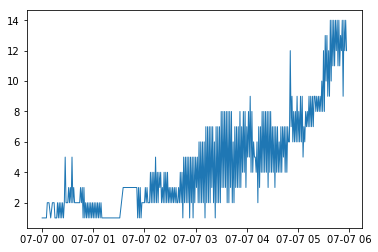

In [18]:
plt.plot(concurrency['readableDate'], concurrency['counts'], linewidth=1)

# Question 4.3

In [19]:
concurrency_43 = concurrency.loc[concurrency['counts'] < 10].copy() 

In [20]:
datas_43 = datas_42.loc[datas_42['readableDate'].isin(concurrency_43['readableDate'])].copy()

In [21]:
scores = datas_43[['company','p2p', 'cdn']].groupby(by = ['company']).sum()

In [22]:
scores['precision_score'] = scores['p2p']/(scores['p2p'] + scores['cdn'])

scores

,p2p,cdn,precision_score
company,,,
Streamroot TV,1.161850e+10,170170008.0,0.985565


The score is really high on this example.

# Question 4.4

In [23]:
datas_4['readableDate'] = datas_4['readableDate'].astype('datetime64[m]')

In [24]:
concurrency = datas_4[['readableDate','content']].groupby(['readableDate','content']).size().reset_index(name='counts')
concurrency['key'] = concurrency['readableDate'].astype(str) + concurrency['content']

In [25]:
datas_4['key'] = datas_4['readableDate'].astype(str) + datas_4['content']

In [26]:
for i in range(0,20) : 
    concurrency_44 = concurrency.loc[concurrency['counts'] > i].copy() 
    datas_44 = datas_4.loc[datas_4['key'].isin(concurrency_44['key'])].copy()
    scores = datas_44[['content','p2p', 'cdn']].groupby(by = ['content']).sum()
    scores['precision_score'] = scores['p2p']/(scores['p2p'] + scores['cdn'])
    scores['isAbove80'] = (scores['precision_score']>0.8)
    print((i, scores['isAbove80'].sum() / len(scores.index)))

(0, 0.30530240265120134)
(1, 0.5464547677261614)
(2, 0.5571428571428572)
(3, 0.5656565656565656)
(4, 0.7045454545454546)
(5, 0.6774193548387096)
(6, 0.6521739130434783)
(7, 0.5882352941176471)
(8, 0.6)
(9, 0.7142857142857143)
(10, 0.6666666666666666)
(11, 0.6666666666666666)
(12, 0.75)
(13, 0.6666666666666666)
(14, 0.5)
(15, 0.5)
(16, 1.0)
(17, 1.0)
(18, nan)
(19, nan)


C:\Users\karim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys


It seems that it starts for a concurrency of 12, then go a bit down, then come back over 75% for a concurrency over 16.